In [ ]:
!pip install psycopg2 matplotlib


import psycopg2
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


In [ ]:

connectdb = {
    "host": "motty.db.elephantsql.com",
    "database": "elydtmmf",
    "user": "elydtmmf",
    "password": "d1_oowviwJv4IzeRTsZBMn9x8Pu4qm9P",
}

try:
    conn = psycopg2.connect(**connectdb)
    print("Teste de conexão OK")

except psycopg2.Error as e:
    print("Error:", e)

conn = psycopg2.connect(**connectdb)


cursor = conn.cursor()


select = "select data_do_atestado, custo_do_afastamento from listagem_atestados"
cursor.execute(select)

dadosdb = cursor.fetchall()


conn.close()



Teste de conexão OK


In [ ]:
date = [result[0] for result in dadosdb]
custo = [result[1] for result in dadosdb]


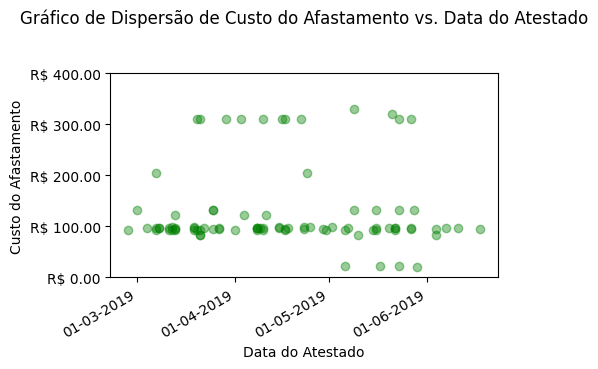

In [ ]:
def formatar_dinheiro(valor, pos):
    return "R$ {:.2f}".format(valor)

plt.figure(figsize=(5, 3))
plt.scatter(date, custo, alpha=0.4, color = "green")
plt.title("Gráfico de Dispersão de Custo do Afastamento vs. Data do Atestado\n\n")

plt.xlabel("Data do Atestado")
plt.ylabel("Custo do Afastamento")
formatter = FuncFormatter(formatar_dinheiro)
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0,400)

date_format = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
import pandas as pd


data = {'data_do_atestado': date, 'custo_do_afastamento': custo}
df = pd.DataFrame(data)
group_custos = df.groupby('custo_do_afastamento').size().reset_index(name='quantidade_afastamentos')


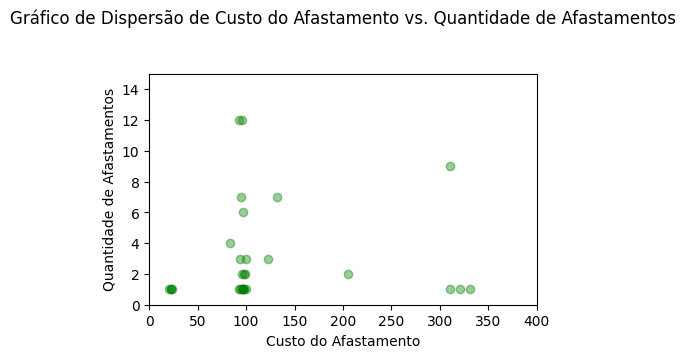

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(group_custos['custo_do_afastamento'], group_custos['quantidade_afastamentos'], alpha=0.4, color ="green")
plt.title("Gráfico de Dispersão de Custo do Afastamento vs. Quantidade de Afastamentos\n\n")
plt.xlabel("Custo do Afastamento")
plt.ylabel("Quantidade de Afastamentos")
plt.xlim(0,400)
plt.ylim(0,15)

plt.show()
